# Revisión preliminar

### Carga de librerías y setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### Carga de datos crudos

In [4]:
data = pd.read_csv('./train_data/train_data.csv')

In [5]:
data.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,relative_velocity_n,t_time_lastob_start,t_time_lastob_end,t_recommended_od_span,t_actual_od_span,t_obs_available,t_obs_used,t_residuals_accepted,t_weighted_rms,t_rcs_estimate,t_cd_area_over_mass,t_cr_area_over_mass,t_sedr,t_j2k_sma,t_j2k_ecc,t_j2k_inc,t_ct_r,t_cn_r,t_cn_t,t_crdot_r,t_crdot_t,t_crdot_n,t_ctdot_r,t_ctdot_t,t_ctdot_n,t_ctdot_rdot,t_cndot_r,t_cndot_t,t_cndot_n,t_cndot_rdot,t_cndot_tdot,c_object_type,c_time_lastob_start,c_time_lastob_end,c_recommended_od_span,c_actual_od_span,c_obs_available,c_obs_used,c_residuals_accepted,c_weighted_rms,c_rcs_estimate,c_cd_area_over_mass,c_cr_area_over_mass,c_sedr,c_j2k_sma,c_j2k_ecc,c_j2k_inc,c_ct_r,c_cn_r,c_cn_t,c_crdot_r,c_crdot_t,c_crdot_n,c_ctdot_r,c_ctdot_t,c_ctdot_n,c_ctdot_rdot,c_cndot_r,c_cndot_t,c_cndot_n,c_cndot_rdot,c_cndot_tdot,t_span,c_span,t_h_apo,t_h_per,c_h_apo,c_h_per,geocentric_latitude,azimuth,elevation,mahalanobis_distance,t_position_covariance_det,c_position_covariance_det,t_sigma_r,c_sigma_r,t_sigma_t,c_sigma_t,t_sigma_n,c_sigma_n,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,-13666.8,-7.2,-12637.0,-5525.9,1.0,0.0,3.78,3.78,459,458,98.9,1.265,0.402,0.013826,0.007173,0.000051,6996.918867,0.003997,97.806412,-0.397969,0.292258,0.040799,0.394221,-0.999674,-0.038498,-0.981098,0.214612,-0.316493,-0.210247,0.170737,-0.001551,0.531593,0.002117,-0.179278,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.607320,0.003144,74.045735,-0.824859,0.473976,-0.002576,0.825216,-0.999998,0.003565,-0.732954,0.220006,-0.814249,-0.220621,0.249855,0.196620,0.722186,-0.196908,-0.668487,1.0,2.0,646.745439,590.818294,650.497251,606.443389,-73.574095,-23.618769,0.029910,129.430951,737347.125225,4.429923e+16,4.057932,266.722309,137.617114,54366.864909,1.781418,46.612573,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,-13319.8,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.79,456,455,98.5,1.270,0.402,0.013487,0.009139,0.000060,6996.920255,0.003996,97.806420,-0.073137,0.297366,0.060541,0.069652,-0.998192,-0.052511,-0.994240,-0.029644,-0.302333,0.034030,0.179696,0.001552,0.561142,-0.005165,-0.181036,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.621053,0.003144,74.045736,-0.818207,0.482754,-0.003578,0.818573,-0.999998,0.004574,-0.728759,0.202595,-0.817490,-0.203216,0.258964,0.195718,0.721903,-0.196008,-0.674979,1.0,2.0,646.743506,590.823004,650.513314,606.454793,-73.570690,-23.618769,0.029079,271.540424,114138.993569,4.378610e+16,3.526780,262.191819,56.070117,54082.067268,1.800959,46.595869,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,-13256.1,-7.0,-12637.0,-5525.9,1.0,0.0,3.79,3.80,456,455,98.5,1.257,0.402,0.013357,0.007057,0.000060,6996.920553,0.003996,97.806418,-0.109230,0.305189,0.043711,0.107079,-0.996235,-0.034287,-0.996674,0.033933,-0.308501,-0.030161,0.123760,0.019630,0.579274,-0.023726,-0.125737,UNKNOWN,180.0,2.0,15.85,15.85,15.0,15.0,100.0,2.36,NaN,0.348701,0.126607,0.001406,7006.623524,0.003144,74.045737,-0.817408,0.483828,-0.003742,0.817774,-0.999998,0.004738,-0.729083,0.201698,-0.817662,-0.202320,0.260092,0.195558,0.721854,-0.195849,-0.675347,1.0,2.0,646.745607,590.821499,650.515082,606.457965,-73.570088,-23.618769,0.029079,347.899292,46960.041117,4.369105e+16,3.362037,261.666544,37.497947,54027.391201,1.821940,46.592757,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,-13350.7,-7.0,-12637.0,-552

In [6]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), str(1)
memory usage: 127.8 MB


In [7]:
data = data.sort_values(["event_id", "time_to_tca"], ascending=[True, False])

### Inspección preliminar de datos

In [8]:
print(f"Cantidad total de eventos únicos: {data['event_id'].nunique()}")

Cantidad total de eventos únicos: 13154


In [9]:
print(f"Cantidad de CDMs promedio por evento: {data.groupby('event_id').size().mean():0.2f}")

Cantidad de CDMs promedio por evento: 12.36


In [10]:
print(f"Estadísticos de la variable riesgo:\n{data['risk'].describe()}")

Estadísticos de la variable riesgo:
count    162634.000000
mean        -19.340603
std          10.011641
min         -30.000000
25%         -30.000000
50%         -17.870632
75%          -9.173294
max          -1.442854
Name: risk, dtype: float64


Generamos un histograma de la variable riesgo

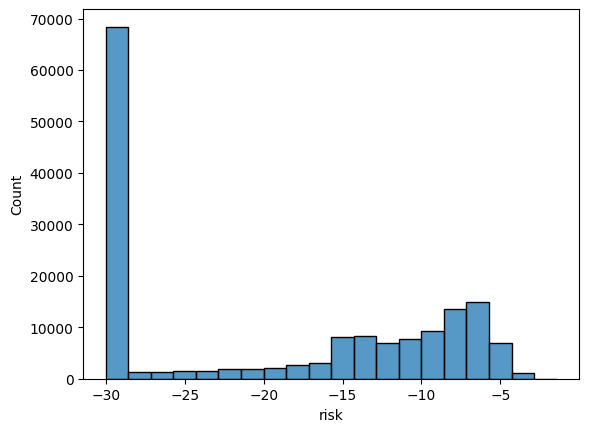

In [11]:
sns.histplot(data=data, x="risk", bins=20)
plt.show()


Revisamos el valor del primer y último riesgo medido para cada evento 

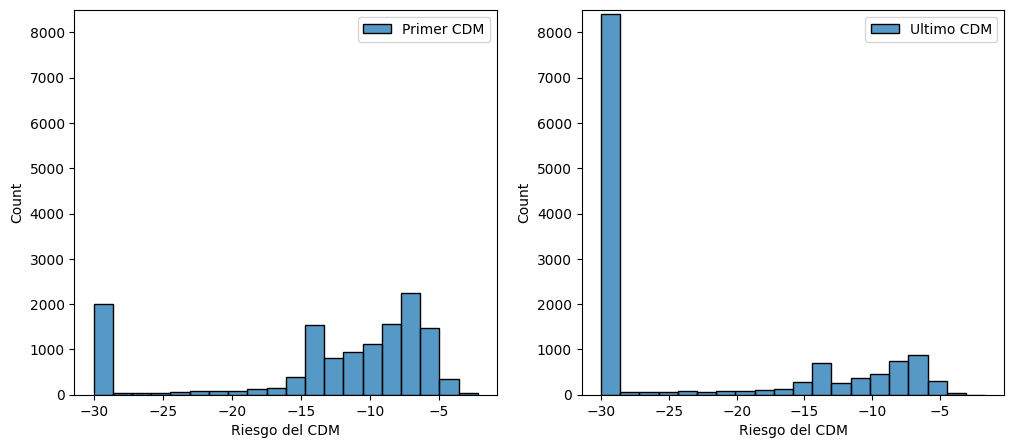

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(
    data=data.groupby('event_id').first()[["risk"]].rename(columns={"risk": "first_risk"}).reset_index(), 
    x="first_risk", 
    bins=20,
    label="Primer CDM",
    ax=axs[0])
sns.histplot(
    data=data.groupby('event_id').last()[["risk"]].rename(columns={"risk": "last_risk"}).reset_index(), 
    x="last_risk", 
    bins=20,
    label="Ultimo CDM",
    ax=axs[1])
axs[0].set_xlabel("Riesgo del CDM")
axs[1].set_xlabel("Riesgo del CDM")
axs[0].set_ylim(0, 8500)
axs[1].set_ylim(0, 8500)
axs[0].legend()
axs[1].legend()
plt.show()

Se observa una tendencia al inicio de cada evento de sobreestimar el riesgo estimado

In [13]:
df = data.groupby("event_id").agg({"risk": "first"}).rename(columns={"risk": "first_risk"}).reset_index().merge(data.groupby("event_id").agg({"risk": "last"}).rename(columns={"risk": "last_risk"}).reset_index(), on="event_id")

In [14]:
df["risk_increased"] = (df["last_risk"] > df["first_risk"]).astype(int)

In [15]:
df["risk_decreased"] = (df["last_risk"] < df["first_risk"]).astype(int)

In [16]:
df["risk_unchanged"] = (df["last_risk"] == df["first_risk"]).astype(int)

In [17]:
print(f"Porcentaje de eventos con riesgo aumentado: {df['risk_increased'].mean():0.2%}")
print(f"Porcentaje de eventos con riesgo disminuido: {df['risk_decreased'].mean():0.2%}")
print(f"Porcentaje de eventos sin cambios en riesgo: {df['risk_unchanged'].mean():0.2%}")

Porcentaje de eventos con riesgo aumentado: 14.51%
Porcentaje de eventos con riesgo disminuido: 70.43%
Porcentaje de eventos sin cambios en riesgo: 15.06%


Calculamos la correlación entre la primera y última medida del riesgo para cada evento

In [18]:
pd.concat(
    [
        data.groupby('event_id').first()[["risk"]].rename(columns={"risk": "first_risk"}),
        data.groupby('event_id').last()[["risk"]].rename(columns={"risk": "last_risk"})
    ],
    axis=1
).corr()

,first_risk,last_risk
first_risk,1.000000,0.248972
last_risk,0.248972,1.000000


Consideramos ahora todos los eventos que tienen una medida de TCA menor a 1 día

In [19]:
events_with_latest_tca_lt_1 = (data.groupby("event_id")["time_to_tca"].min()[data.groupby("event_id")["time_to_tca"].min() < 1]).index.tolist()
data_filtered = data[data["event_id"].isin(events_with_latest_tca_lt_1)]

Y todos los eventos que tienen un CDM con TCA mayor a 2 días

In [20]:
events_with_first_tca_gt_2 =(data_filtered.groupby("event_id")["time_to_tca"].max()[data_filtered.groupby("event_id")["time_to_tca"].max() > 2]).index.tolist()
data_filtered = data_filtered[data_filtered["event_id"].isin(events_with_first_tca_gt_2)]

Para esos eventos, calculamos la correlación entre el riesgo en la última medición previa a 2 días del TCA y el último riesgo medido

In [21]:
pd.concat(
    [
        data_filtered[data_filtered["time_to_tca"] >= 2].groupby("event_id").last()[["risk"]].rename(columns={"risk": "risk_gt_2"}),
        data_filtered.groupby("event_id").last()[["risk"]].rename(columns={"risk": "risk_final"})
    ],
    axis=1
).corr()

,risk_gt_2,risk_final
risk_gt_2,1.000000,0.478809
risk_final,0.478809,1.000000


Gráficamente

In [22]:
df = pd.concat(
        [
            data_filtered[data_filtered["time_to_tca"] >= 2].groupby("event_id").last()[["risk"]].rename(columns={"risk": "risk_gt_2"}),
            data_filtered.groupby("event_id").last()[["risk"]].rename(columns={"risk": "risk_final"})
        ],
        axis=1
    )

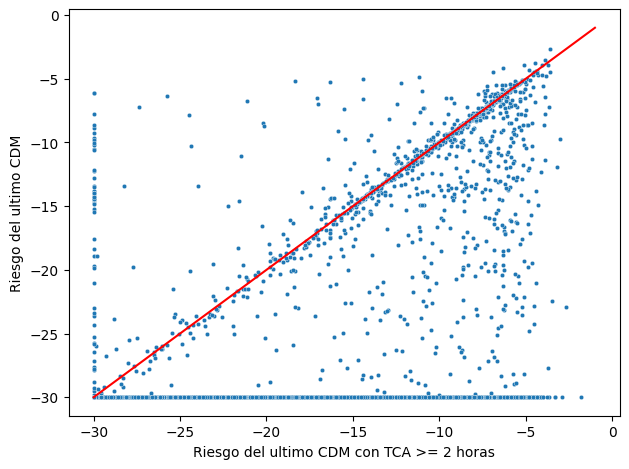

In [26]:
sns.scatterplot(
    data=df,
    x="risk_gt_2",
    y="risk_final",
    s=10
)
plt.xlabel("Riesgo del ultimo CDM con TCA >= 2 horas")
plt.ylabel("Riesgo del ultimo CDM")
plt.plot([-30, -1], [-30, -1], color="red", linestyle="-")
plt.tight_layout()
plt.show()

En el caso ideal, los puntos deben concentrarse sobre la recta roja